**Tópicos do Notebook**<a id='toc0_'></a>    
- [📈 Análise Exploratória de Dados — Parte 2: Insights com Dados Tratados](#toc1_)    
- [Importações e Extração dos Dados](#toc2_)    
- [Análise Exploratória Dos Dados (EDA)](#toc3_)    
    - [Começando pela tabela "olist_orders"](#toc3_1_1_)    
  - [Sazonalidades de Pedidos](#toc3_2_)    
    - [Ponto de atenção: pico inesperado de pedidos em 2017](#toc3_2_1_)    
      - [Conclusão: Motivo do "Boom" de Vendas no dia 24/11/2017](#toc3_2_1_1_)    
  - [Sazonalidade dos Pedidos Cancelados](#toc3_3_)    
    - [Ponto de atenção: Picos de Cancelamentos em Fevereiro e Agosto de 2018](#toc3_3_1_)    
    - [Investigando os picos de cancelamentos: Fevereiro e Agosto de 2018](#toc3_3_2_)    
    - [Investigando Fevereiro](#toc3_3_3_)    
    - [Conclusão — Cancelamentos em Fevereiro de 2018](#toc3_3_4_)    
    - [Investigando Agosto](#toc3_3_5_)    
      - [Hipóteses Investigadas](#toc3_3_5_1_)    
    - [Conclusão – Cancelamentos em Agosto de 2018](#toc3_3_6_)    
    - [Avaliações](#toc3_3_7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[📈 Análise Exploratória de Dados — Parte 2: Insights com Dados Tratados](#toc0_)

**Com os dados previamente limpos e padronizados, esta etapa tem como objetivo realizar uma exploração estratégica para extrair insights relevantes e responder perguntas-chave de negócio.**

🔍 O foco desta análise será:

- Identificar padrões de comportamento, tendências e sazonalidades  
- Correlacionar variáveis e tabelas, e investigar possíveis relações logicas e/ou estatísticas  
- Responder perguntas orientadas pelo domínio e objetivo do projeto  

---

# <a id='toc2_'></a>[Importações e Extração dos Dados](#toc0_)

In [35]:
import pandas as pd                       # Biblioteca para manipulação e análise de dados
import numpy as np                        # Biblioteca para operações matemáticas e arrays multidimensionais
import matplotlib.pyplot as plt           # Biblioteca para criação de gráficos estáticos em 2D
import seaborn as sns                     # Biblioteca baseada no Matplotlib para visualizações estatísticas mais sofisticadas
from wordcloud import WordCloud, STOPWORDS # Ferramentas para criação de nuvens de palavras e definição de palavras irrelevantes (stopwords)

In [ ]:
# Carrega os arquivos CSV gerados nas etapas anteriores de tratamento (preprocessing) dos dados
olist_geolocation = pd.read_csv("C:/Users/Pasta/Olist/Dados Limpos/olist_geolocation.csv")
olist_customers = pd.read_csv("C:/Users/Pasta/Olist/Dados Limpos/olist_customers.csv")
olist_sellers = pd.read_csv("C:/Users/Pasta/Olist/Dados Limpos/olist_sellers.csv")
olist_products = pd.read_csv("C:/Users/Pasta/Olist/Dados Limpos/olist_products.csv")
olist_orders = pd.read_csv("C:/Users/Pasta/Olist/Dados Limpos/olist_orders.csv")
olist_order_items = pd.read_csv("C:/Users/Pasta/Olist/Dados Limpos/olist_order_items.csv")
olist_order_payments = pd.read_csv("C:/Users/Pasta/Olist/Dados Limpos/olist_order_payments.csv")
olist_order_reviews = pd.read_csv("C:/Users/Pasta/Olist/Dados Limpos/olist_order_reviews.csv")
comentarios = pd.read_csv("C:/Users/Pasta/Olist/Dados Limpos/comentarios.csv")

# <a id='toc3_'></a>[Análise Exploratória Dos Dados (EDA)](#toc0_)

### <a id='toc3_1_1_'></a>[Começando pela tabela "olist_orders"](#toc0_)

A tabela `olist_orders` contém informações detalhadas sobre cada pedido realizado na plataforma, como:

- Status do pedido (`order_status`)
- Data de compra (`order_purchase_timestamp`)
- Datas de aprovação, envio e entrega (`order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`)
- Data estimada de entrega (`order_estimated_delivery_date`)

Esses dados são fundamentais para dar início à análise, pois permitem:

- Compreender o fluxo completo do pedido, desde a compra até a entrega
- Identificar gargalos no processo logístico
- Analisar o comportamento de compra ao longo do tempo
- Estudar a sazonalidade e padrões recorrentes nos pedidos

Ao explorar essa tabela, ganhamos um panorama inicial sólido para entender o funcionamento da operação e os hábitos dos consumidores.
Com isso, podemos correlacionar e integrar outras tabelas conforme a necessidade da análise, enriquecendo os insights obtidos.

In [37]:
# Visualiza as 5 primeiras linhas do DataFrame para relembrar o formato dos dados
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,entregue,2017-09-13,2017-09-13,2017-09-19,2017-09-20,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,entregue,2017-04-26,2017-04-26,2017-05-04,2017-05-12,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,entregue,2018-01-14,2018-01-14,2018-01-16,2018-01-22,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,entregue,2018-08-08,2018-08-08,2018-08-10,2018-08-14,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,entregue,2017-02-04,2017-02-04,2017-02-16,2017-03-01,2017-03-17


In [38]:
# Exibe informações gerais sobre o DataFrame, como tipo de dados de cada coluna e quantidade de valores não nulos
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99418 entries, 0 to 99417
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99418 non-null  object
 1   customer_id                    99418 non-null  object
 2   order_status                   99418 non-null  object
 3   order_purchase_timestamp       99418 non-null  object
 4   order_approved_at              99272 non-null  object
 5   order_delivered_carrier_date   97637 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  99418 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [39]:
# Convertendo colunas de datas para o tipo datetime

# Define uma lista com os nomes das colunas que armazenam informações de data/hora
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

# Aplica a conversão para datetime em cada coluna da lista, utilizando 'coerce' para tratar valores inválidos como NaT
for col in date_columns:
    olist_orders[col] = pd.to_datetime(olist_orders[col], errors='coerce')

In [40]:
# Exibe estatísticas descritivas de todas as colunas do DataFrame, incluindo dados numéricos, categóricos e de texto
olist_orders.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99418,99418,99418,99418,99272,97637,96461,99418
unique,99418,99418,8,NaN,NaN,NaN,NaN,NaN
top,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,entregue,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-30 18:21:34.461767424,2017-12-31 05:10:19.099040768,2018-01-04 07:04:57.809232384,2018-01-13 20:32:24.412768,2018-01-24 04:00:40.266349824
min,NaN,NaN,NaN,2016-09-04 00:00:00,2016-09-15 00:00:00,2016-10-08 00:00:00,2016-10-11 00:00:00,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 00:00:00,2017-09-12 00:00:00,2017-09-15 00:00:00,2017-09-25 00:00:00,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 00:00:00,2018-01-19 00:00:00,2018-01-24 00:00:00,2018-02-02 00:00:00,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 00:00:00,2018-05-04 00:00:00,2018-05-08 00:00:00,2018-05-15 00:00:00,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 00:00:00,2018-09-03 00:00:00,2018-09-11 00:00:00,2018-10-17 00:00:00,2018-11-12 00:00:00


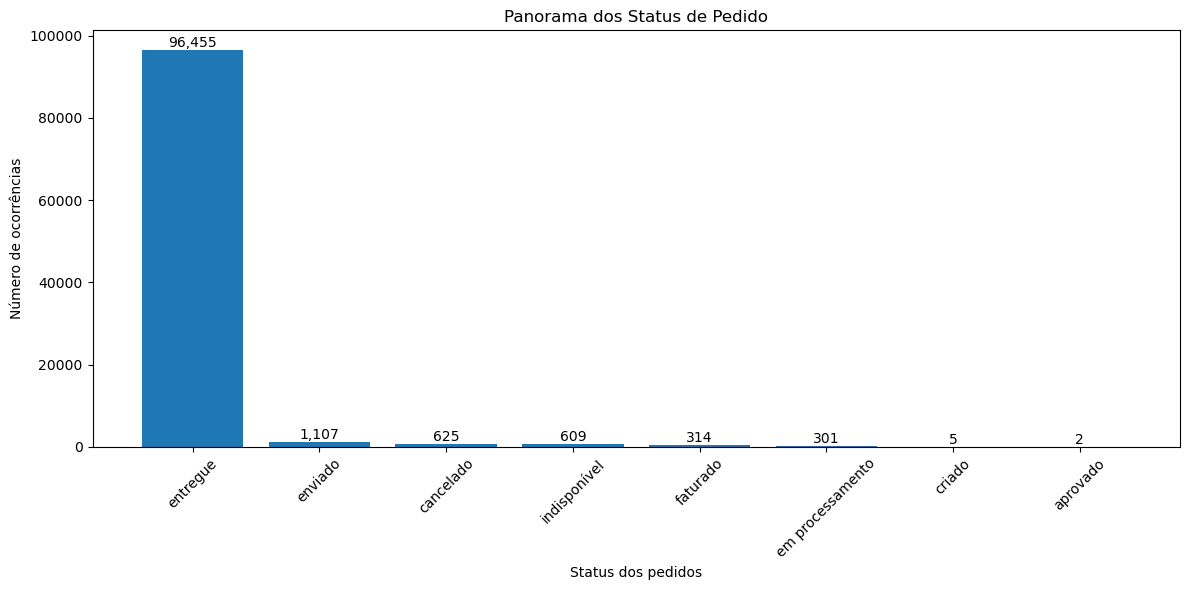

In [41]:
# Visualiza a distribuição dos pedidos conforme o status

order_status = olist_orders['order_status'].value_counts()

plt.figure(figsize=(12,6))
bars = plt.bar(order_status.index, order_status)

plt.xlabel('Status dos pedidos')
plt.ylabel('Número de ocorrências')
plt.title('Panorama dos Status de Pedido')

# Insere rótulos numéricos no topo de cada barra do gráfico, usando separador de milhar para facilitar leitura
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{height:,}',  # Separador de milhar
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()       # Ajusta o layout para evitar cortes
plt.show()               # Exibe o gráfico

## <a id='toc3_2_'></a>[Sazonalidades de Pedidos](#toc0_)

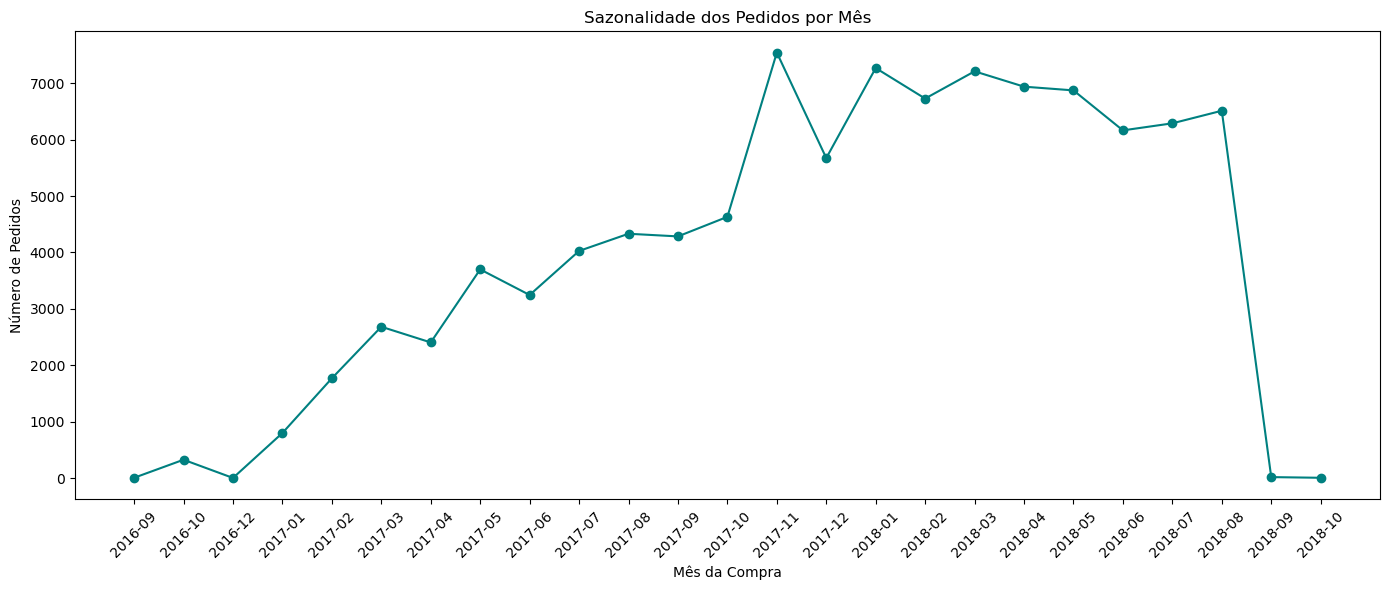

In [42]:
"""Analisando a sazonalidade dos pedidos ao longo dos meses para entender as tendências"""

# Agrupa os pedidos por período mensal (ano e mês), contabiliza e ordena cronologicamente
pedidos_por_mes = (
    olist_orders['order_purchase_timestamp']
    .dt.to_period('M')
    .value_counts()
    .sort_index()
)

# Gera um gráfico de linha mostrando o volume de pedidos por mês ao longo do tempo
plt.figure(figsize=(14,6))
plt.plot(pedidos_por_mes.index.astype(str), pedidos_por_mes.values, marker='o', color='teal')
plt.xlabel('Mês da Compra')
plt.ylabel('Número de Pedidos')
plt.title('Sazonalidade dos Pedidos por Mês')
plt.xticks(rotation=45)                   # Rotaciona os rótulos do eixo x para facilitar leitura
plt.tight_layout()                        # Ajusta o layout automaticamente para evitar sobreposição
plt.show()                                # Exibe o gráfico na tela

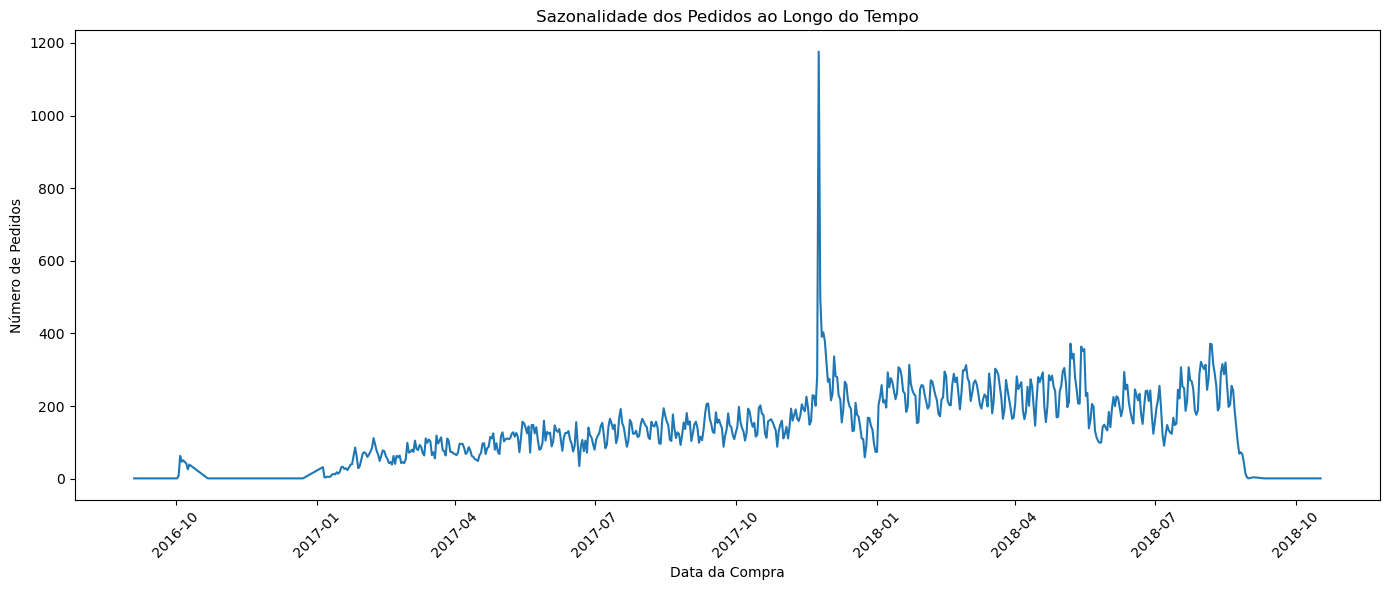

In [43]:
# Sazonalidade dos Pedidos por dia

# Agrupa os pedidos por data (dia), contabiliza ocorrências e ordena cronologicamente
contagem_ocorrencias = olist_orders['order_purchase_timestamp'].dt.date.value_counts().sort_index()

# Gera um gráfico de linha para visualizar a distribuição diária dos pedidos ao longo do tempo
plt.figure(figsize=(14,6))
plt.plot(contagem_ocorrencias.index, contagem_ocorrencias.values)
plt.xlabel('Data da Compra')
plt.ylabel('Número de Pedidos')
plt.title('Sazonalidade dos Pedidos ao Longo do Tempo')
plt.xticks(rotation=45)                    # Rotaciona os rótulos do eixo x para facilitar leitura
plt.tight_layout()                         # Ajusta o layout automaticamente para evitar sobreposição
plt.show()                                 # Exibe o gráfico

### <a id='toc3_2_1_'></a>[Ponto de atenção: pico inesperado de pedidos em 2017](#toc0_)

Durante o ano de 2017, foi identificado um dia específico no final do ano em que o número de pedidos realizados ultrapassou em grande escala todos os outros dias registrados. Esse comportamento fora da curva pode indicar uma ação promocional relevante, sazonalidade intensa (como vendas de Natal), ou até mesmo alguma anomalia nos dados que merece investigação.

A partir dessa descoberta, será realizada uma análise para:

- Identificar os pedidos realizados nesse dia
- Verificar quais produtos foram comprados e suas respectivas categorias
- Avaliar os desfechos dos pedidos (entregues com sucesso, cancelados, atrasados, etc)

Com isso, será possível entender melhor o impacto desse pico nas operações da plataforma e, se necessário, correlacionar com outras tabelas para aprofundar os insights.

In [44]:
# Identifica a data com o maior número de pedidos e imprime o resultado formatado

dia_top_vendas = contagem_ocorrencias.idxmax()      # Encontra a data com maior volume de pedidos
vendas_maximas = contagem_ocorrencias.max()         # Captura o número total de pedidos nesse dia

print(f'O dia com mais pedidos foi {dia_top_vendas} com {vendas_maximas} pedidos.')

O dia com mais pedidos foi 2017-11-24 com 1176 pedidos.


In [45]:
# Filtra os pedidos realizados no dia com maior volume de vendas
pedidos_no_dia = olist_orders[
    olist_orders['order_purchase_timestamp'].dt.date == dia_top_vendas
]

# Realiza o merge com os dados dos itens de pedido para obter detalhes dos produtos
pedidos_com_itens = pedidos_no_dia.merge(
    olist_order_items, on='order_id', how='inner'
)

# Conta os produtos mais vendidos nesse dia com base no ID do produto
produtos_mais_vendidos = pedidos_com_itens['product_id'].value_counts()

# Exibe os 10 produtos mais vendidos no dia de pico
print(produtos_mais_vendidos.head(10))

product_id
422879e10f46682990de24d770e7f83d    25
368c6c730842d78016ad823897a372db    23
53759a2ecddad2bb87a079a1f1519f73    18
9ecadb84c81da840dbf3564378b586e9    18
389d119b48cf3043d311335e499d9c6b    14
99a4788cb24856965c36a24e339b6058    12
e2c3ed9aaddfd2312a6a5fe9b3ddadd3     9
0bcc3eeca39e1064258aa1e932269894     8
fe01b643060a6446e59f58e3021e66b3     7
9ad75bd7267e5c724cb42c71ac56ca72     6
Name: count, dtype: int64


In [46]:
# Verifica se houve alguma categoria com destaque em vendas no dia com maior volume de pedidos

# Realiza o merge com a tabela de produtos para obter a categoria de cada item vendido
pedidos_com_categorias = pedidos_com_itens.merge(
    olist_products[['product_id', 'product_category_name']],
    on='product_id',
    how='left'
)

# Conta as categorias mais vendidas no dia, ordenando em ordem decrescente
categorias_mais_vendidas = (
    pedidos_com_categorias['product_category_name']
    .value_counts()
    .sort_values(ascending=False)
)

# Exibe as 10 categorias com maior número de vendas no dia de pico
print("📦 Ranking de Categorias Vendidas no Dia com Mais Pedidos")
print(categorias_mais_vendidas.head(10))

# Extrai os nomes das 10 categorias mais vendidas para futura análise
top_categorias = categorias_mais_vendidas.head(10).index.tolist()

# Cria uma base consolidada contendo pedidos, produtos e categorias para todas as datas
pedidos_completos = olist_orders.merge(
    olist_order_items[['order_id', 'product_id']],
    on='order_id',
    how='inner'
).merge(
    olist_products[['product_id', 'product_category_name']],
    on='product_id',
    how='left'
)

# Adiciona uma coluna com apenas a data da compra para facilitar agrupamentos
pedidos_completos['data'] = pedidos_completos['order_purchase_timestamp'].dt.date

# Filtra os pedidos que pertencem às 10 categorias mais vendidas no dia de pico
pedidos_top_categorias = pedidos_completos[
    pedidos_completos['product_category_name'].isin(top_categorias)
]

# Agrupa por data e categoria, contabilizando o número de vendas por dia
vendas_diarias = (
    pedidos_top_categorias
    .groupby(['product_category_name', 'data'])
    .size()
    .reset_index(name='vendas')
)

# Calcula a média diária de vendas para cada uma das top categorias
media_diaria = (
    vendas_diarias
    .groupby('product_category_name')['vendas']
    .mean()
    .round(2)
)

# Exibe o resultado final com a média diária de vendas por categoria
print("📊 Média Diária de Vendas — Top 10 Categorias do Dia com Mais Pedidos")
print(media_diaria)


📦 Ranking de Categorias Vendidas no Dia com Mais Pedidos
product_category_name
cama_mesa_banho           195
moveis_decoracao          136
ferramentas_jardim        102
esporte_lazer              91
beleza_saude               89
telefonia                  79
relogios_presentes         75
brinquedos                 73
informatica_acessorios     71
perfumaria                 62
Name: count, dtype: int64
📊 Média Diária de Vendas — Top 10 Categorias do Dia com Mais Pedidos
product_category_name
beleza_saude              16.06
brinquedos                 6.98
cama_mesa_banho           18.59
esporte_lazer             14.33
ferramentas_jardim         7.43
informatica_acessorios    13.20
moveis_decoracao          13.72
perfumaria                 5.89
relogios_presentes        10.49
telefonia                  7.73
Name: vendas, dtype: float64


In [47]:
# Vendo o número de clientes únicos que fizeram compras no dia com maior volume de pedidos

# Realiza o merge com a tabela de clientes para obter o identificador único de cada consumidor
pedidos_com_clientes = pedidos_no_dia.merge(
    olist_customers[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left'
)

# Conta quantos clientes distintos realizaram pedidos nesse dia
clientes_distintos = pedidos_com_clientes['customer_unique_id'].nunique()

print(f'{clientes_distintos} clientes únicos fizeram pedidos em {dia_top_vendas}.')

1161 clientes únicos fizeram pedidos em 2017-11-24.


In [48]:
# Conta o número de pedidos realizados por cada cliente único no dia com maior volume de vendas
ranking_clientes = pedidos_com_clientes['customer_unique_id'].value_counts()

# Exibe os 10 clientes que mais realizaram compras nesse dia
print("Ranking dos Clientes no Dia com Mais Vendas")
print(ranking_clientes.head(10))


Ranking dos Clientes no Dia com Mais Vendas
customer_unique_id
0e4cb268bd62da7db135af6349b4fc2a    3
a0f0a2082b269a9715ba874c94b592f3    2
f99fa0c7b369bde9c53edc9e6f6c4a58    2
7e82fd8a6c26147a8797d761fa68c497    2
99d1962d736052c7b8793ba94126c377    2
179f496c6c02a7640d09f0843452e0fc    2
692074726678229d1fe1887a9f0abb14    2
c0536ee7a009264e0f1bf1c8f4c54ad3    2
8e84222ad36cb6ab528b745ae6e18d11    2
7bff4fff725edd40fde6f0ac1eb0e2dc    2
Name: count, dtype: int64


In [49]:
# Verifica o status dos pedidos realizados no dia com maior volume de vendas (24/11/2017)

# Filtra os pedidos com data correspondente ao dia de maior vendas
pedidos_bd = olist_orders[
    olist_orders['order_purchase_timestamp'].dt.date == dia_top_vendas
]

# Conta quantos pedidos existem para cada status (entregue, cancelado, etc)
status_bd = pedidos_bd['order_status'].value_counts()

# Exibe a distribuição dos status de pedidos do dia em questão
print("📦 Distribuição dos Status dos Pedidos (24/11/2017)")
print(status_bd)

📦 Distribuição dos Status dos Pedidos (24/11/2017)
order_status
entregue            1147
enviado               12
indisponível          10
faturado               4
em processamento       3
Name: count, dtype: int64


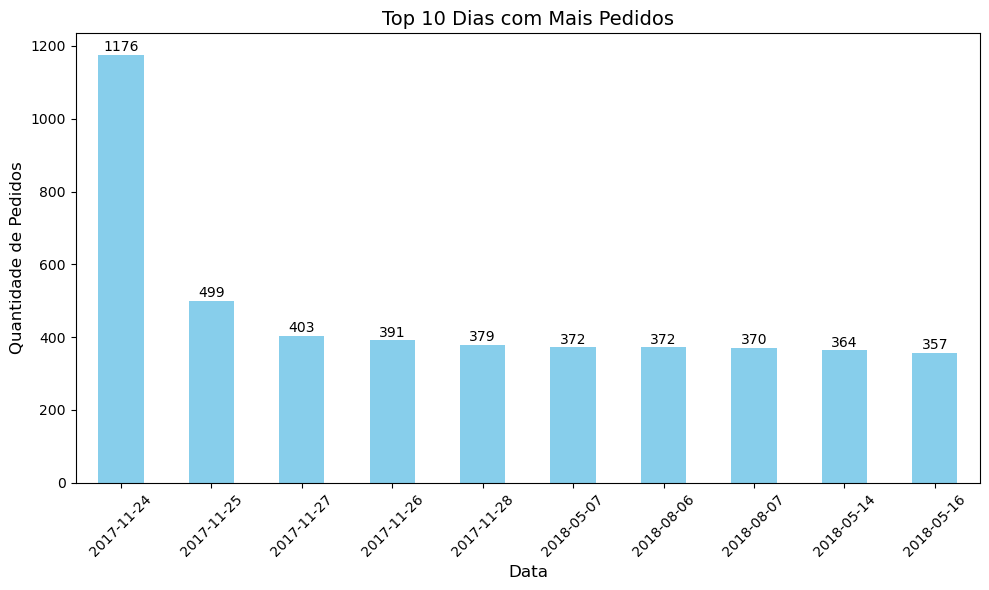

In [50]:
# Dados: os 10 dias com mais pedidos
top_10_dias = contagem_ocorrencias.nlargest(10)

# Criação do gráfico
plt.figure(figsize=(10,6))
bars = top_10_dias.plot(kind='bar', color='skyblue')

# Título e rótulos
plt.title('Top 10 Dias com Mais Pedidos', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade de Pedidos', fontsize=12)
plt.xticks(rotation=45)

# Adicionando os valores no topo de cada barra
for idx, value in enumerate(top_10_dias):
    plt.text(x=idx, y=value + 10, s=f'{value}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()



#### <a id='toc3_2_1_1_'></a>[Conclusão: Motivo do "Boom" de Vendas no dia 24/11/2017](#toc0_)

Através da análise dos dados disponíveis, não foram encontrados indícios de erro ou presença de outliers nos pedidos realizados, sendo todos aparentemente legítimos e coerentes com o padrão operacional da plataforma.

Ao buscar uma explicação contextual, foi descoberto que o dia 24/11/2017 corresponde à Black Friday — uma das maiores datas comerciais do ano no Brasil e no mundo. Essa informação esclarece o motivo do aumento súbito e expressivo nas vendas, com picos na quantidade de pedidos, diversidade de produtos vendidos, e volume de clientes ativos.

Com base nisso, pode-se concluir que o "boom" foi uma resposta direta à demanda impulsionada pela Black Friday, gerando efeitos visíveis em toda a cadeia: dos produtos às categorias, dos clientes aos status logísticos dos pedidos. O cenário mostra a força das campanhas promocionais e da sazonalidade no comportamento do consumidor.

## <a id='toc3_3_'></a>[Sazonalidade dos Pedidos Cancelados](#toc0_)

Nesta etapa, o foco será exclusivo nos pedidos cujo status é "cancelado". Ao isolar esses dados, é possível analisar padrões sazonais, entender picos de cancelamentos, e investigar se há datas, períodos ou eventos específicos que influenciam negativamente a finalização das compras.

A análise poderá revelar, por exemplo:

- Se há meses com cancelamentos acima da média
- Se os cancelamentos estão concentrados em determinadas categorias de produtos
- Se há recorrência entre clientes que cancelam frequentemente
- Se datas comerciais como Black Friday ou Natal impactam nos índices de cancelamento

Esses insights ajudam a compreender melhor o comportamento dos consumidores e possíveis fragilidades no processo logístico, além de orientar ações corretivas e preventivas para melhorar a conversão de pedidos.

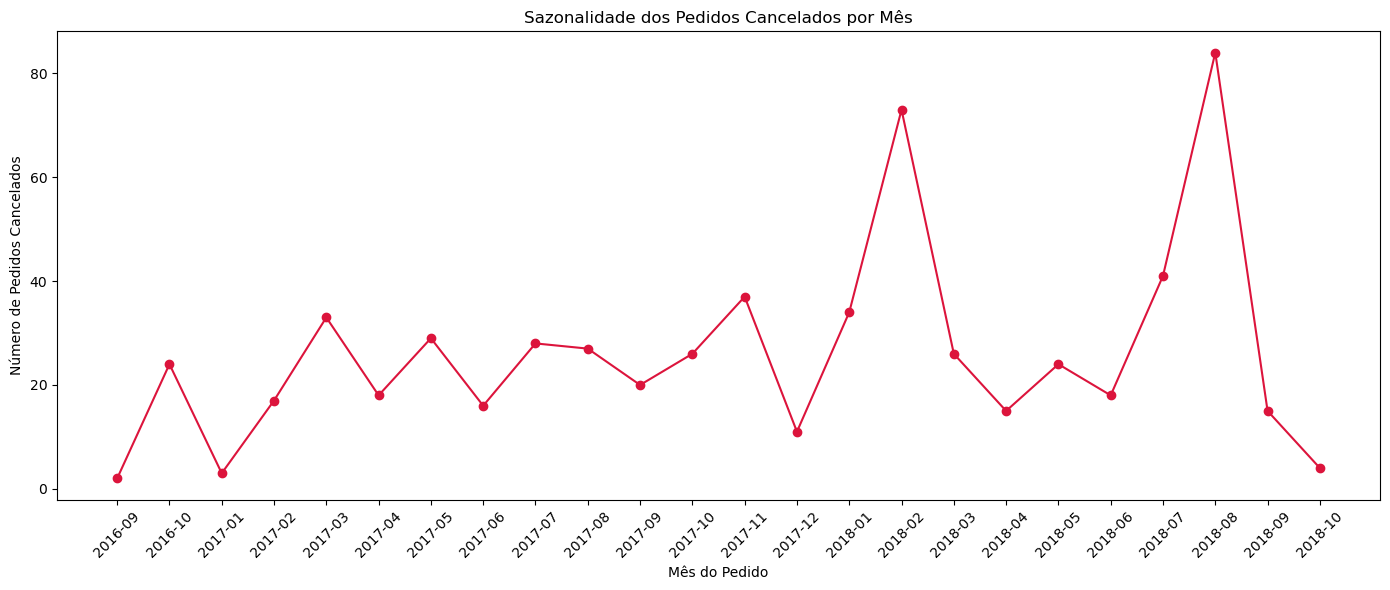

In [51]:
# Filtra apenas os pedidos cujo status é "cancelado"
pedidos_cancelados = olist_orders[olist_orders['order_status'] == 'cancelado']

# Agrupa os pedidos cancelados por mês (ano e mês), contabiliza e ordena cronologicamente
cancelamentos_por_mes = (
    pedidos_cancelados['order_purchase_timestamp']
    .dt.to_period('M')
    .value_counts()
    .sort_index()
)

# Gera um gráfico de linha mostrando a sazonalidade dos pedidos cancelados ao longo dos meses
plt.figure(figsize=(14,6))
plt.plot(cancelamentos_por_mes.index.astype(str), cancelamentos_por_mes.values, marker='o', color='crimson')

plt.xlabel('Mês do Pedido')
plt.ylabel('Número de Pedidos Cancelados')
plt.title('Sazonalidade dos Pedidos Cancelados por Mês')
plt.xticks(rotation=45)                         # Rotaciona rótulos para melhor leitura
plt.tight_layout()                              # Ajusta o layout automaticamente
plt.show()                                      # Exibe o gráfico

C:\Users\Paulo\AppData\Local\Temp\ipykernel_49408\403779278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos_cancelados['data'] = pedidos_cancelados['order_purchase_timestamp'].dt.date


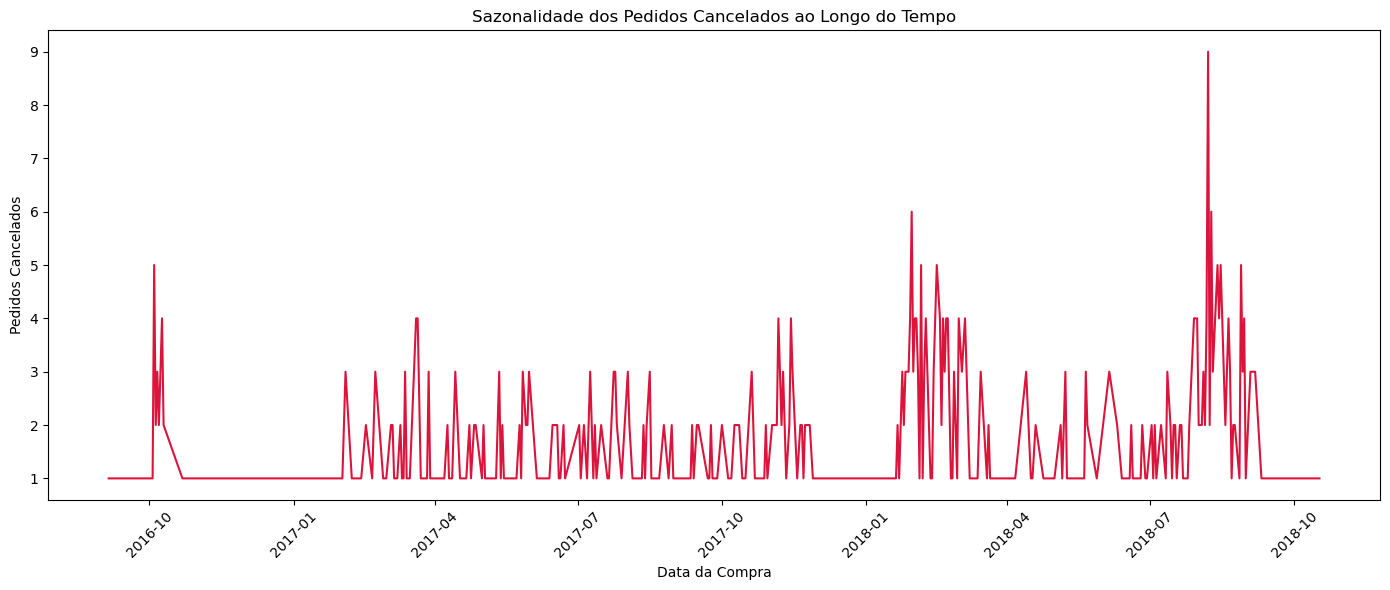

In [52]:
# Sazonalidade dos pedidos cancelados com visualização diária

# Cria uma nova coluna com apenas a data da compra, sem o horário
pedidos_cancelados['data'] = pedidos_cancelados['order_purchase_timestamp'].dt.date

# Agrupa e contabiliza o número de pedidos cancelados por dia, ordenando cronologicamente
cancelamentos_por_dia = (
    pedidos_cancelados['data']
    .value_counts()
    .sort_index()
)

# Gera um gráfico de linha para visualizar os cancelamentos ao longo dos dias
plt.figure(figsize=(14,6))
plt.plot(cancelamentos_por_dia.index, cancelamentos_por_dia.values, color='crimson')

plt.xlabel('Data da Compra')
plt.ylabel('Pedidos Cancelados')
plt.title('Sazonalidade dos Pedidos Cancelados ao Longo do Tempo')
plt.xticks(rotation=45)                                  # Rotaciona rótulos para melhor leitura
plt.tight_layout()                                       # Ajusta layout para evitar sobreposição
plt.show()                                               # Exibe o gráfico

### <a id='toc3_3_1_'></a>[Ponto de atenção: Picos de Cancelamentos em Fevereiro e Agosto de 2018](#toc0_)

Ao analisar a sazonalidade dos pedidos cancelados, dois picos claros se destacam nos meses de **Fevereiro** e **Agosto de 2018**. Esses aumentos fora do padrão indicam que algo ocorreu nesses períodos que contribuiu para um número elevado de cancelamentos.

Possíveis hipóteses que podem ser exploradas:
- Problemas logísticos ou operacionais na plataforma durante esses meses
- Ações promocionais que geraram volume excessivo de pedidos com falhas no processamento
- Questões relacionadas à disponibilidade de produtos ou insatisfação com prazos de entrega
- Impactos externos como datas comemorativas, feriados prolongados ou instabilidades econômicas

Com base nesses picos, o próximo passo seria aprofundar a investigação:
- Ver quais categorias de produtos tiveram maior incidência de cancelamentos nesses meses
- Verificar se há recorrência entre clientes ou vendedores envolvidos
- Avaliar os canais logísticos e regiões mais afetadas

Esses dados ajudam a entender vulnerabilidades sazonais e podem orientar melhorias no processo de compra e atendimento.

### <a id='toc3_3_2_'></a>[Investigando os picos de cancelamentos: Fevereiro e Agosto de 2018](#toc0_)

Para aprofundar a análise dos cancelamentos ocorridos em Fevereiro e Agosto de 2018, será utilizada uma abordagem qualitativa sobre os **reviews/comentários** associados aos pedidos.

Como ferramenta de apoio, será aplicada uma técnica bastante comum de exploração de texto: a **nuvem de palavras** (_word cloud_). Essa visualização ajuda a identificar termos que aparecem com maior frequência nas avaliações dos pedidos cancelados, permitindo:

- Detectar possíveis **motivos recorrentes** de insatisfação ou reclamações
- Compreender a **linguagem dos consumidores** em períodos críticos
- Identificar padrões ou palavras-chave ligadas a problemas logísticos, atrasos, qualidade de produtos, entre outros

Essa etapa pode ser especialmente reveladora para encontrar **justificativas espontâneas** dos próprios clientes, contribuindo para diagnósticos mais precisos e ações corretivas eficazes.

In [53]:
# Investigação de comentários associados a pedidos cancelados

# Seleciona pedidos cancelados em fevereiro de 2018
cancelados_fev_2018 = olist_orders[
    (olist_orders['order_status'] == 'cancelado') &
    (olist_orders['order_purchase_timestamp'].dt.year == 2018) &
    (olist_orders['order_purchase_timestamp'].dt.month == 2)
]

# Seleciona pedidos cancelados em agosto de 2018
cancelados_ago_2018 = olist_orders[
    (olist_orders['order_status'] == 'cancelado') &
    (olist_orders['order_purchase_timestamp'].dt.year == 2018) &
    (olist_orders['order_purchase_timestamp'].dt.month == 8)
]

# Extrai os IDs dos pedidos cancelados
ids_fev = cancelados_fev_2018['order_id'].unique()
ids_ago = cancelados_ago_2018['order_id'].unique()

# Filtra os comentários vinculados aos pedidos cancelados
comentarios_fev = comentarios[comentarios['order_id'].isin(ids_fev)]
comentarios_ago = comentarios[comentarios['order_id'].isin(ids_ago)]

# Exibe quantidade de comentários encontrados
print(f"Número de comentários de pedidos cancelados em fev/2018: {len(comentarios_fev)}")
print(f"Número de comentários de pedidos cancelados em ago/2018: {len(comentarios_ago)}")

Número de comentários de pedidos cancelados em fev/2018: 45
Número de comentários de pedidos cancelados em ago/2018: 63


### <a id='toc3_3_3_'></a>[Investigando Fevereiro](#toc0_)


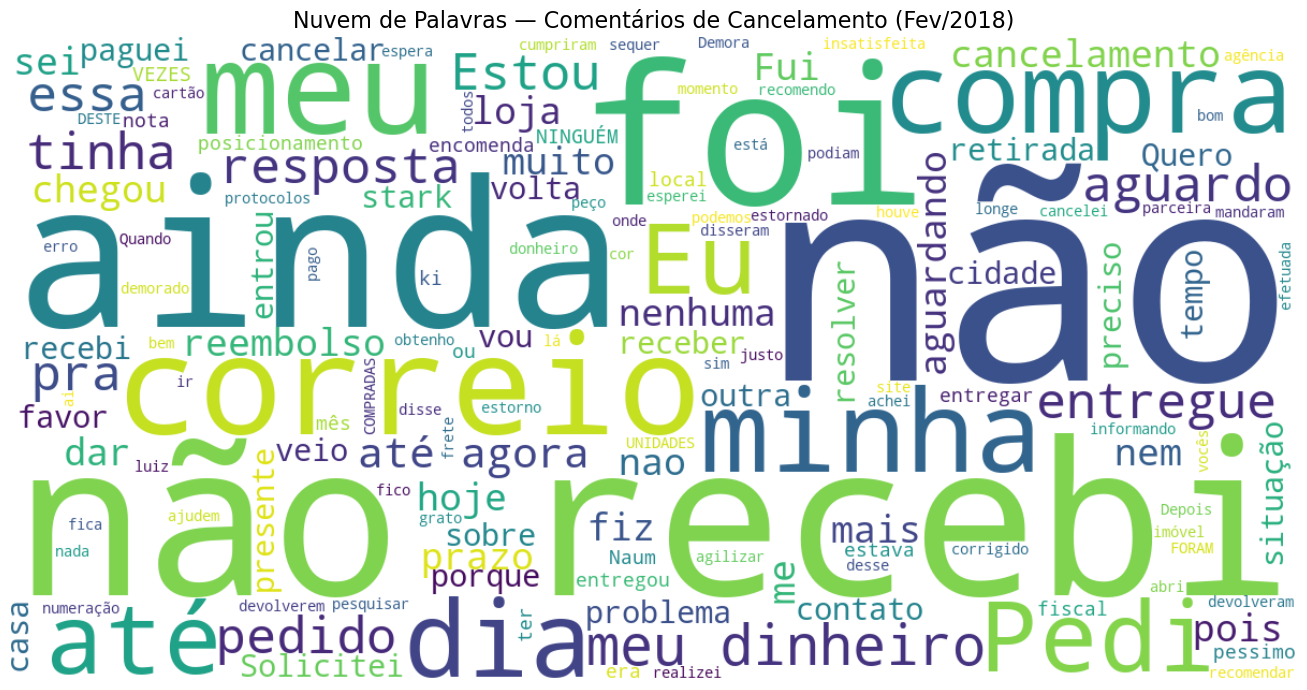

In [54]:
# Nuvem de Palavras — Fevereiro de 2018

# Definição de stopwords: palavras comuns em português removidas para destacar termos relevantes
stopwords_pt = set([
    'a', 'à', 'ao', 'aos', 'as', 'com', 'como', 'da', 'das', 'de', 'dela',
    'dele', 'do', 'dos', 'e', 'em', 'entre', 'esse', 'esta', 'isto', 'já',
    'mas', 'na', 'nas', 'no', 'nos', 'o', 'os', 'para', 'por', 'que',
    'sem', 'se', 'sua', 'são', 'também', 'tem', 'um', 'uma', 'é',
    'produto', 'entrega'  # termos genéricos removidos manualmente
])

# Consolidação dos comentários: junta todos os textos em uma única string
texto_fev = " ".join(comentarios_fev['full_review_text'].dropna().astype(str))

# Geração da nuvem de palavras: define dimensões, cores, quantidade máxima de palavras e aplica filtro de stopwords
wordcloud = WordCloud(
    width=1200, height=600,
    background_color='white',
    colormap='viridis',
    max_words=150,
    stopwords=stopwords_pt
).generate(texto_fev)

# Exibição gráfica: mostra a nuvem de palavras e ajusta layout visual
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # oculta os eixos para foco no conteúdo visual
plt.title('Nuvem de Palavras — Comentários de Cancelamento (Fev/2018)', fontsize=16)
plt.tight_layout()
plt.show()

In [55]:
# Exemplos de Comentários em Fevereiro

# Seleciona aleatoriamente 10 comentários de pedidos cancelados em fevereiro
comentarios_fev['full_review_text'].sample(10)

33955    Não recebi meu produto, como que faço para ter...
4588     preciso receber já está pago, houve erro de nu...
26864    PESSIMO, PERGUNTEI VÁRIAS VEZES SOBRE A ENTREG...
3792                       bom mas o problema foi correios
11243    Depois de muito tempo de espera mandaram o pro...
874                          Demora, produto nao entregue!
23475    Trata-se presente p/criança. Questionei por e-...
38718     até agora estou esperando minha encomenda chegar
25051    Estou aguardando o produto ate hoje desde o di...
23097    Ainda posso dar minha opinião pois ainda não c...
Name: full_review_text, dtype: object

In [70]:
# Impacto financeiro

# Filtrar pedidos entregues fevereiro de 2018
fev2018_entregues = olist_orders[
    (olist_orders['order_status'] == 'entregue') &
    (olist_orders['order_purchase_timestamp'].dt.month == 2) &
    (olist_orders['order_purchase_timestamp'].dt.year == 2018)
]

# Juntar pedidos com os valores
cancelados_valores = cancelados_fev_2018.merge(olist_order_items, on='order_id', how='left')
concluidos_valores = fev2018_entregues.merge(olist_order_items, on='order_id', how='left')

# Somar os valores
valor_cancelado = cancelados_valores['price'].sum()
valor_concluido = concluidos_valores['price'].sum()

perda_percentual = (valor_cancelado / (valor_cancelado + valor_concluido)) * 100

print(f"O pico de cancelamentos em fevereiro de 2018 representou uma perda de {perda_percentual:.2f}% da receita total do mês.")

O pico de cancelamentos em fevereiro de 2018 representou uma perda de 0.75% da receita total do mês.


### <a id='toc3_3_4_'></a>[Conclusão — Cancelamentos em Fevereiro de 2018](#toc0_)

A análise dos comentários de pedidos cancelados revelou com nitidez o principal fator associado aos cancelamentos: problemas operacionais nos Correios.

A partir da nuvem de palavras, termos como **"correio"**, **"atraso"**, **"Não recebi"** e semelhantes se destacaram visualmente. Essa percepção foi reforçada por exemplos de avaliações e uma rápida verificação externa, que confirmou a ocorrência de uma paralisação significativa nos serviços dos Correios em fevereiro de 2018.

Apesar de não se tratar exatamente de uma greve formal, houve uma série de dificuldades operacionais que comprometeram a logística das entregas, causando atrasos e frustrações aos consumidores. Como consequência, observou-se um aumento expressivo nos cancelamentos durante esse período.

### <a id='toc3_3_5_'></a>[Investigando Agosto](#toc0_)

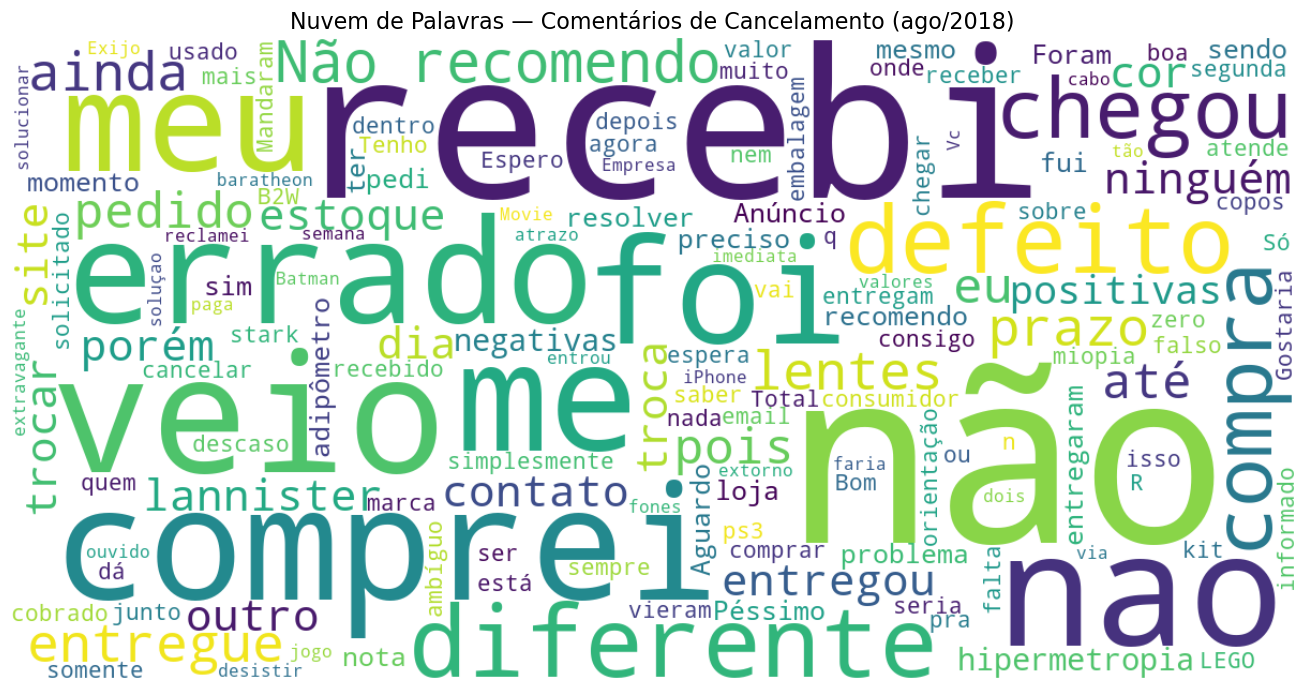

In [56]:
# Nuvem de Palavras — Agosto de 2018

# Consolidação dos comentários: junta todos os textos em uma única string
texto_ago = " ".join(comentarios_ago['full_review_text'].dropna().astype(str))

# Geração da nuvem de palavras: define dimensões, cores, quantidade máxima de palavras e aplica filtro de stopwords
wordcloud = WordCloud(
    width=1200, height=600,
    background_color='white',
    colormap='viridis',
    max_words=150,
    stopwords=stopwords_pt
).generate(texto_ago)

# Exibição gráfica: mostra a nuvem de palavras e ajusta layout visual
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # oculta os eixos para foco no conteúdo visual
plt.title('Nuvem de Palavras — Comentários de Cancelamento (ago/2018)', fontsize=16)
plt.tight_layout()
plt.show()

In [57]:
# Exemplos de Comentários em Agosto

# Seleciona aleatoriamente 10 comentários de pedidos cancelados em agosto
comentarios_ago['full_review_text'].sample(10)

35948    Anúncio ambíguo dá errado Lentes de contato sã...
18551    Produto não funciona O produto não está funcio...
40041    Não recebi Não recebi ainda o produto, por não...
18313    Pedido em espera  Recebi um email informando s...
8227     Nota zero. Produto falso! Falso e com arranhõe...
3004     Produto errado Comprei o jogo LEGO Movie (ps3)...
36167    Anúncio ambíguo dá errado Lentes de contato sã...
36669    Sem produto em estoque Comprei e depois me avi...
12689    não recomendo produto não veio conforme o comp...
34962    Recebi produto diferente Recebi um produto dif...
Name: full_review_text, dtype: object

In [58]:
# Filtra os pedidos que foram cancelados especificamente no mês de agosto de 2018,
# com base no status do pedido e na data da compra.
canceled_aug_2018 = olist_orders[
    (olist_orders['order_status'] == 'cancelado') &
    (olist_orders['order_purchase_timestamp'].dt.to_period('M') == '2018-08')
]

#### <a id='toc3_3_5_1_'></a>[Hipóteses Investigadas](#toc0_)

Foram consideradas as seguintes possíveis causas para o aumento de cancelamentos em agosto de 2018:

- **Problemas com vendedores específicos (sellers):**
Algum seller pode ter enfrentado falhas logísticas, atrasos ou queda na qualidade dos produtos.

- **Falhas em categorias ou produtos específicos:**
Itens de determinadas categorias (como eletrônicos ou moda) podem ter apresentado defeitos recorrentes ou erros no envio.

- **Problemas regionais:**
Alguma região pode ter sofrido com dificuldades de transporte, operação local ou limitações logísticas.


In [59]:
# Realiza junção com a tabela de itens do pedido para obter informações como 'seller_id' e 'product_id'
cancel_items = pd.merge(canceled_aug_2018, olist_order_items, on='order_id', how='left')

# Adiciona a categoria do produto ao DataFrame, por meio da junção com a tabela de produtos
cancel_items = pd.merge(cancel_items, olist_products[['product_id', 'product_category_name']], on='product_id', how='left')

# Acrescenta a informação da UF do cliente (estado), por meio da junção com a tabela de clientes
cancel_items = pd.merge(cancel_items, olist_customers[['customer_id', 'customer_state']], on='customer_id', how='left')


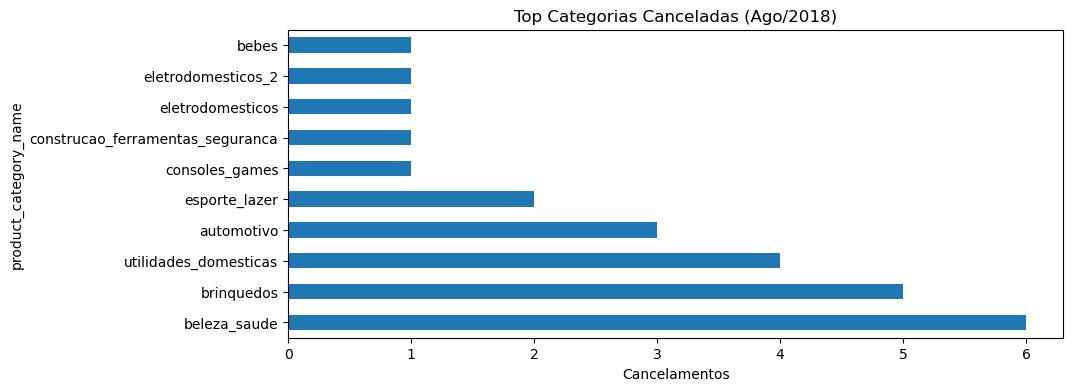

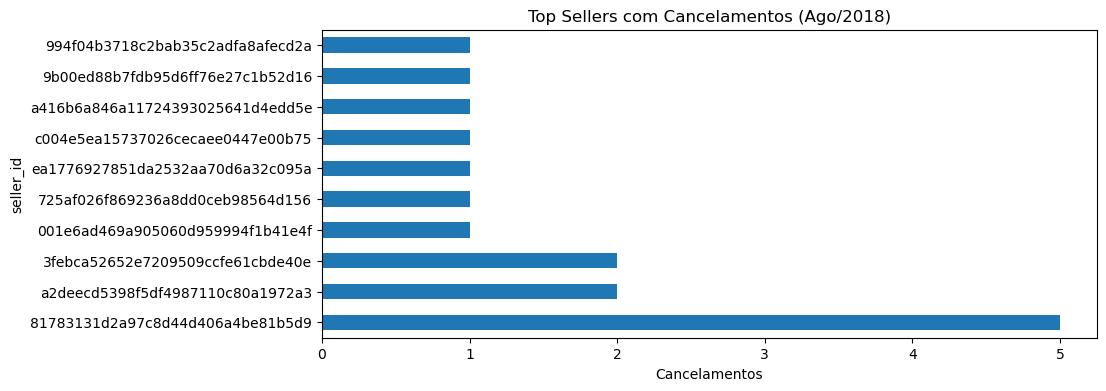

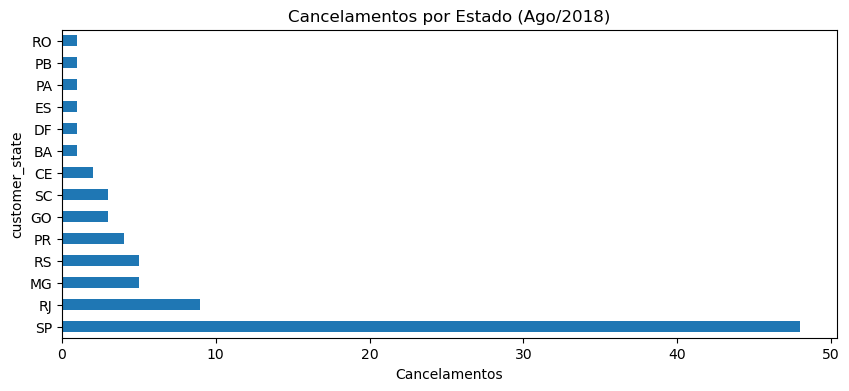

In [60]:
# Agrupa e ordena as 10 categorias de produtos com maior número de cancelamentos
top_categorias = (
    cancel_items.groupby('product_category_name')
    .size()
    .sort_values(ascending=False)
    .head(10)
)

# Agrupa e ordena os 10 vendedores (sellers) com maior número de pedidos cancelados
top_sellers = (
    cancel_items.groupby('seller_id')
    .size()
    .sort_values(ascending=False)
    .head(10)
)

# Agrupa e ordena os estados com maior número de cancelamentos
top_estados = (
    cancel_items.groupby('customer_state')
    .size()
    .sort_values(ascending=False)
)

# Gráficos

# Gráfico horizontal com as categorias mais afetadas por cancelamentos
top_categorias.plot(kind='barh', title='Top Categorias Canceladas (Ago/2018)', figsize=(10,4))
plt.xlabel('Cancelamentos')
plt.show()

# Gráfico horizontal com os sellers mais impactados
top_sellers.plot(kind='barh', title='Top Sellers com Cancelamentos (Ago/2018)', figsize=(10,4))
plt.xlabel('Cancelamentos')
plt.show()

# Gráfico horizontal com os estados que mais registraram cancelamentos
top_estados.plot(kind='barh', title='Cancelamentos por Estado (Ago/2018)', figsize=(10,4))
plt.xlabel('Cancelamentos')
plt.show()


Análise de Cancelamentos por Categoria, Seller e Estado

Com os dados de cancelamento, realizamos a contagem dos pedidos cancelados em três dimensões:

- **Categorias de produto**: Quais tipos de produtos mais sofreram cancelamentos.
- **Vendedores (sellers)**: Quais parceiros comerciais registraram mais pedidos cancelados.
- **Estados (UFs)**: Quais regiões concentraram mais cancelamentos.

Os resultados são apresentados graficamente para facilitar a comparação entre os principais responsáveis ou afetados.

In [61]:
"""
Análise proporcional dos cancelamentos por estado - Agosto/2018

Observou-se que o estado de São Paulo apresenta o maior número absoluto de cancelamentos. 
No entanto, essa diferença só representa um problema real se a proporção de cancelamentos 
for significativamente superior à média, considerando o total de pedidos realizados no estado.

Por exemplo, 48 cancelamentos em São Paulo seriam esperados se o estado também concentrasse 
a maior parte das vendas no período. O que caracterizaria uma anomalia é uma taxa de 
cancelamento desproporcional em relação ao volume de pedidos.

Para investigar esse cenário, serão calculados:
- O total de pedidos por estado em agosto/2018;
- O número de cancelamentos por estado;
- A taxa percentual de cancelamento por UF.

Esses indicadores permitirão identificar se algum estado apresenta uma taxa atípica em relação ao comportamento geral.
"""


# Junta os dados de pedidos com a tabela de clientes para obter a informação do estado (UF)
orders = pd.merge(olist_orders, olist_customers[['customer_id', 'customer_state']], on='customer_id', how='left')

# Filtra apenas os pedidos realizados em agosto de 2018
orders_aug_2018 = orders[orders['order_purchase_timestamp'].dt.to_period('M') == '2018-08']

# Conta o total de pedidos realizados por estado
total_pedidos_estado = orders_aug_2018.groupby('customer_state')['order_id'].count()

# Conta o total de pedidos cancelados por estado
cancelamentos_estado = orders_aug_2018[orders_aug_2018['order_status'] == 'cancelado'] \
    .groupby('customer_state')['order_id'].count()

# Cria um DataFrame com o total de pedidos, total de cancelamentos e calcula a taxa percentual
df_estado = pd.DataFrame({
    'total_pedidos': total_pedidos_estado,
    'cancelamentos': cancelamentos_estado
}).fillna(0)

# Calcula a taxa de cancelamento (%)
df_estado['taxa_cancelamento'] = (df_estado['cancelamentos'] / df_estado['total_pedidos']) * 100

# Ordena do estado com maior para menor taxa de cancelamento
df_estado = df_estado.sort_values(by='taxa_cancelamento', ascending=False)

# Exibe o resultado final
print(df_estado)




                total_pedidos  cancelamentos  taxa_cancelamento
customer_state                                                 
RO                          9            1.0          11.111111
CE                         57            2.0           3.508772
PB                         30            1.0           3.333333
GO                        120            3.0           2.500000
PA                         44            1.0           2.272727
RS                        300            5.0           1.666667
SP                       3253           48.0           1.475561
SC                        206            3.0           1.456311
PR                        333            4.0           1.201201
RJ                        745            8.0           1.073826
ES                        105            1.0           0.952381
MG                        708            5.0           0.706215
DF                        145            1.0           0.689655
BA                        165           

In [62]:
# Checando os produtos individualmente

# Contabiliza os 10 produtos com maior número de cancelamentos
top_products = cancel_items['product_id'].value_counts().head(10).reset_index()

# Renomeia as colunas para facilitar a leitura
top_products.columns = ['product_id', 'cancelamentos']

# Junta com a tabela de produtos para obter o nome da categoria correspondente
top_prod_info = pd.merge(top_products, olist_products[['product_id', 'product_category_name']], on='product_id', how='left')

# Exibe o resultado com ID do produto, categoria e número de cancelamentos
print(top_prod_info[['product_id', 'product_category_name', 'cancelamentos']])


                         product_id  product_category_name  cancelamentos
0  49f19939bc5c8639e06c36d3bf01ee98             brinquedos              4
1  7174375d5bea2b7612929eae33df48d1           beleza_saude              2
2  c8e7c2ef329fcda4a233e7e2f8bb8b7d  utilidades_domesticas              1
3  69c2cca014581e7e3756142963a69313       eletrodomesticos              1
4  46c24b0c339975a99512fd7f9e781063                  bebes              1
5  cbfdbf24b32d9aceeeff3e9c77fd9d36       moveis_decoracao              1
6  f582884ed8bb76a4b6317b8c9e966d98  utilidades_domesticas              1
7  38c7e0727a11964ebc52a23bead7d4f5             automotivo              1
8  9b393d3360316521a943267765a47fbf           beleza_saude              1
9  62a1ce72d0ae030be91a89a46480e1f6             automotivo              1


Hipótese:

- Os pedidos feitos em agosto de 2018 foram mais propensos a atraso, o que pode ter causado frustração e, consequentemente, aumento no número de cancelamentos (ainda que proporcional ao crescimento geral de vendas).

In [63]:
# Cria a coluna 'dias_atraso', que representa a diferença entre a data de entrega real e a data de entrega estimada.
# Valores positivos indicam atraso na entrega; negativos indicam entrega adiantada.
olist_orders['dias_atraso'] = (olist_orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days

<Axes: title={'center': 'Atraso médio nas entregas por mês'}, xlabel='mes'>

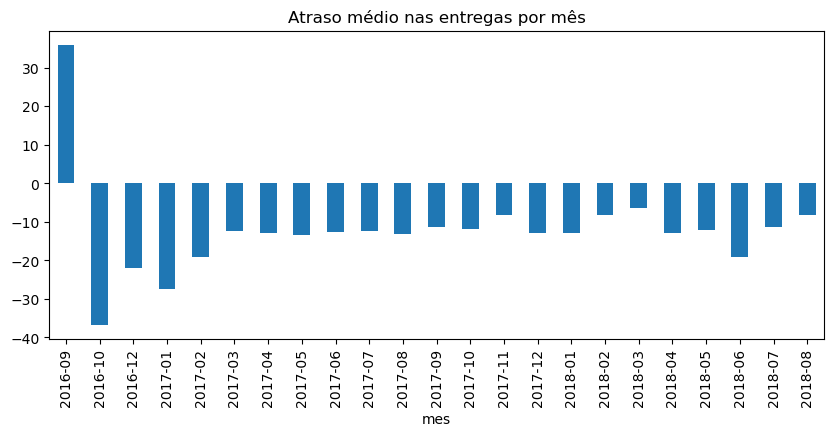

In [64]:
# Filtra apenas os pedidos que foram efetivamente entregues
entregues = olist_orders[olist_orders['order_status'] == 'entregue'].copy()

# Cria a coluna 'mes' a partir da data de compra, agrupando por mês (ano+mês)
entregues['mes'] = entregues['order_purchase_timestamp'].dt.to_period('M')

# Calcula o atraso médio das entregas para cada mês
atraso_mensal = entregues.groupby('mes')['dias_atraso'].mean().round(2)

# Plota o atraso médio mensal em um gráfico de barras
atraso_mensal.plot(kind='bar', figsize=(10,4), title='Atraso médio nas entregas por mês')


In [65]:
"""
Análise do prazo prometido para pedidos cancelados:
Embora não tenham sido entregues, queremos entender se o prazo estimado era excessivamente longo,
o que poderia influenciar negativamente a percepção do cliente e contribuir para o cancelamento.
"""

# Filtra pedidos cancelados no mês de agosto de 2018
cancelados = orders[
    (orders['order_status'] == 'cancelado') &
    (orders['order_purchase_timestamp'].dt.to_period('M') == '2018-08')
].copy() # Para evitar o aviso de SettingWithCopyWarning

# Calcula o prazo prometido em dias (estimado - data da compra)
cancelados.loc[:, 'prazo_prometido'] = (
    cancelados['order_estimated_delivery_date'] - cancelados['order_purchase_timestamp']
).dt.days

"""
Agora comparamos com os pedidos que foram entregues no mesmo mês.
A ideia é avaliar se os prazos prometidos nos pedidos cancelados estavam significativamente acima da média.
"""

# Filtra pedidos entregues com compra realizada em agosto de 2018
entregues_agosto = entregues[entregues['order_purchase_timestamp'].dt.to_period('M') == '2018-08'].copy() # Para evitar o aviso de SettingWithCopyWarning

# Calcula o prazo prometido também para os entregues
entregues_agosto.loc[:, 'prazo_prometido'] = (
    entregues_agosto['order_estimated_delivery_date'] - entregues_agosto['order_purchase_timestamp']
).dt.days

# Exibe o prazo médio prometido para os dois grupos
print("Prazo médio prometido (cancelados agosto):", cancelados['prazo_prometido'].mean())
print("Prazo médio prometido (entregues agosto):", entregues_agosto['prazo_prometido'].mean())


Prazo médio prometido (cancelados agosto): 17.05952380952381
Prazo médio prometido (entregues agosto): 15.82034325303102


In [ ]:
# Impacto financeiro

# Filtrar pedidos entregues agosto de 2018
ago2018_entregues = olist_orders[
    (olist_orders['order_status'] == 'entregue') &
    (olist_orders['order_purchase_timestamp'].dt.month == 8) &
    (olist_orders['order_purchase_timestamp'].dt.year == 2018)
]

# Juntar pedidos com os valores
cancelados_valores = cancelados_ago_2018.merge(olist_order_items, on='order_id', how='left')
concluidos_valores = ago2018_entregues.merge(olist_order_items, on='order_id', how='left')

# Somar os valores
valor_cancelado = cancelados_valores['price'].sum()
valor_concluido = concluidos_valores['price'].sum()

perda_percentual = (valor_cancelado / (valor_cancelado + valor_concluido)) * 100

print(f"O pico de cancelamentos em agosto de 2018 representou uma perda de {perda_percentual:.2f}% da receita total do mês.")

O pico de cancelamentos em agosto de 2018 representou uma perda de 0.69% da receita total do mês.


### <a id='toc3_3_6_'></a>[Conclusão – Cancelamentos em Agosto de 2018](#toc0_)

A análise dos cancelamentos realizados em agosto de 2018 revelou um aumento atípico no volume de pedidos cancelados. No entanto, ao investigar diferentes possíveis causas operacionais, nenhuma anormalidade significativa foi encontrada.

Foram avaliados produtos, categorias, sellers e regiões de entrega — todos apresentaram distribuição proporcional ao volume de vendas. As métricas logísticas também não indicaram desvios relevantes: os prazos prometidos e os atrasos permaneceram dentro da média histórica. Comentários dos clientes não revelaram padrões consistentes ou reclamações recorrentes, e o volume total de pedidos no mês se manteve estável, sem crescimento brusco que justificasse uma sobrecarga operacional.

Dessa forma, não foi possível atribuir o pico de cancelamentos a uma causa específica baseada nos dados disponíveis. A recomendação é manter um monitoramento sistemático dos indicadores de cancelamento, a fim de identificar rapidamente padrões emergentes em análises futuras.

### <a id='toc3_3_7_'></a>[Avaliações](#toc0_)

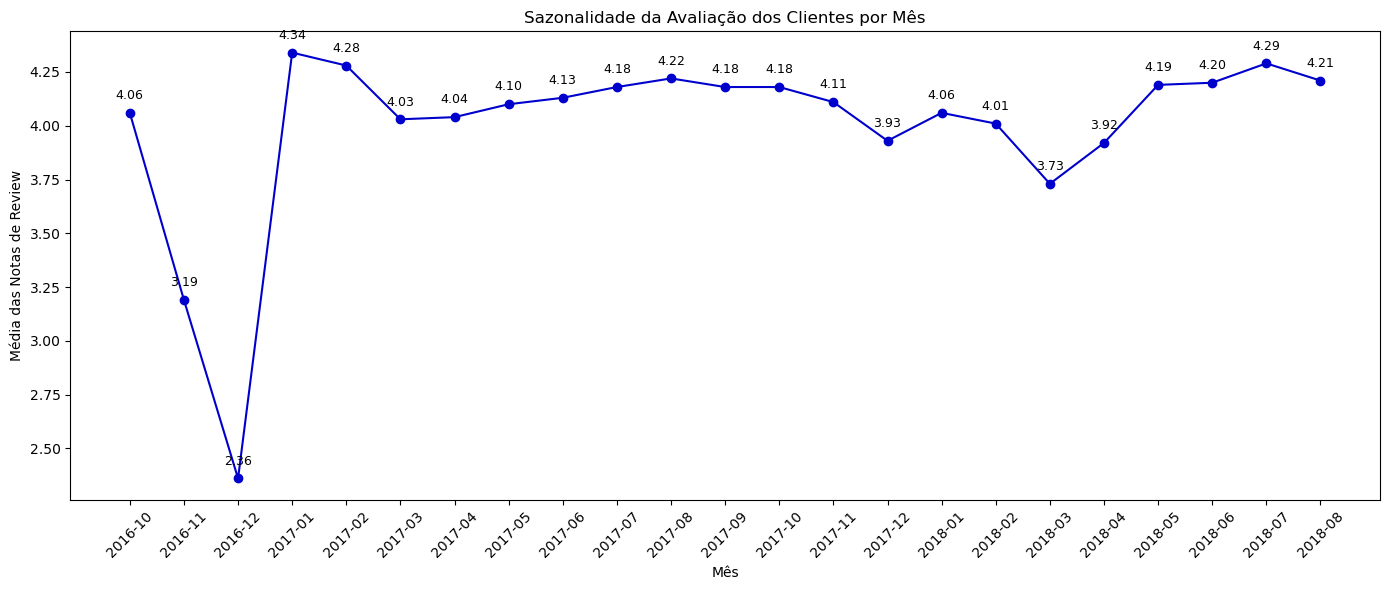

In [72]:
# Verifica se os eventos de fevereiro e agosto de 2018 impactaram a avaliação dos clientes
# A hipótese é que problemas operacionais nesses meses possam ter reduzido as notas das avaliações.

# Garante que a coluna com a data de criação da review está no formato datetime
olist_order_reviews['review_creation_date'] = pd.to_datetime(
    olist_order_reviews['review_creation_date'], errors='coerce'
)

# Cria a coluna 'ano_mes' para agrupar as avaliações por mês (formato: AAAA-MM)
olist_order_reviews['ano_mes'] = olist_order_reviews['review_creation_date'].dt.to_period('M')

# Calcula a média mensal das notas de avaliação (review_score), com 2 casas decimais
media_mensal_reviews = (
    olist_order_reviews.groupby('ano_mes')['review_score']
    .mean()
    .round(2)
)

# Plota a evolução da média das notas de avaliação ao longo do tempo
plt.figure(figsize=(14,6))
plt.plot(media_mensal_reviews.index.astype(str), media_mensal_reviews.values, marker='o', color='mediumblue')
plt.xlabel('Mês')
plt.ylabel('Média das Notas de Review')
plt.title('Sazonalidade da Avaliação dos Clientes por Mês')
plt.xticks(rotation=45)

# Adiciona rótulos de dados sobre cada ponto
for i, (x, y) in enumerate(zip(media_mensal_reviews.index.astype(str), media_mensal_reviews.values)):
    plt.text(x, y + 0.05, f'{y:.2f}', ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()



**Baixa na Média de Avaliações — Dezembro de 2016**

Foi identificado um ponto fora da curva na média de avaliações em dezembro de 2016, com uma nota significativamente abaixo dos demais períodos. No entanto, é provável que essa queda não esteja relacionada a um problema real, mas sim ao baixo volume de avaliações registradas naquele mês, o que tende a distorcer a média.

Para confirmar essa hipótese, será gerado um gráfico semelhante ao anterior, mas com foco na **contagem total de avaliações ao longo do tempo**. Isso permitirá verificar se a quantidade de reviews em dezembro de 2016 foi realmente inferior, sustentando a explicação estatística para a anomalia observada.

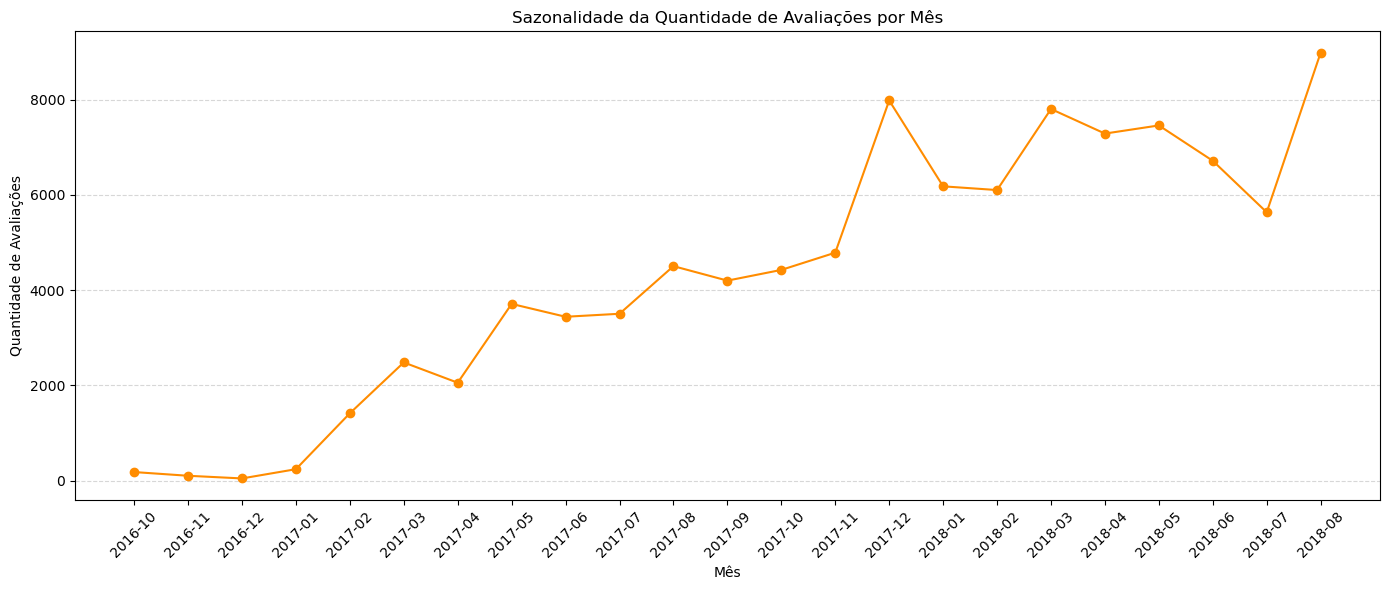

In [67]:
# Contagem de Avaliações por Mês

# Agrupa os dados de avaliações por período (ano/mês) e contabiliza o número de reviews em cada mês
contagem_mensal_reviews = (
    olist_order_reviews.groupby('ano_mes')['review_id']
    .count()
)

# Gera um gráfico de linha para visualizar a variação na quantidade de avaliações ao longo do tempo
plt.figure(figsize=(14,6))
plt.plot(
    contagem_mensal_reviews.index.astype(str),
    contagem_mensal_reviews.values,
    marker='o',
    color='darkorange'
)
plt.xlabel('Mês')
plt.ylabel('Quantidade de Avaliações')
plt.title('Sazonalidade da Quantidade de Avaliações por Mês')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Confirmação da Hipótese — Dezembro de 2016**

Como previsto, a queda acentuada na média das avaliações registrada em dezembro de 2016 é consequência direta do baixo volume de reviews naquele mês. A análise da contagem mensal confirmou que houve uma quantidade significativamente menor de avaliações, o que tende a ampliar o impacto de notas mais baixas e distorcer a média geral.

Esse resultado reforça a importância de considerar o volume de dados ao interpretar indicadores de desempenho, evitando conclusões precipitadas baseadas em amostragens reduzidas.